<a href="https://colab.research.google.com/github/skourta/clustering_eval/blob/main/OPTDIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("R.matlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’




In [2]:
install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", "Rmixmod", "Rtsne", "lle", "cluster", "aricode", "caret"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘matrixStats’, ‘RcppArmadillo’, ‘lava’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘lazyeval’, ‘later’, ‘prodlim’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘snow’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘RcppEigen’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘snowfall’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:

install.packages("umap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘reticulate’, ‘RSpectra’




# 1 Introduction au tables de donnees

In [109]:
library(R.matlab)
library(Rmixmod)
library(mclust)
library(NbClust)
library(FactoMineR)
library(lle)
library(cluster)
library(aricode)
library(Rtsne)
library(caret)
library(umap)

In [110]:
optidigits=readMat("data/Optdigits.mat")

# OPTIDIGITS

Optical Recognition of Handwritten Digits :

> Cette dataset regroupe 5620 observation de 64 variables d'entree (de 0 à 16) et une variable classe (de 0 à 9).

> Les 5620 observations sont des bitmaps de 8x8 générer à partir des bitmaps de 32x32 écrit à main par 43 volaontaires. Par conséquence, la variance est petite et on a réduit la dimentionnalité.






## Visualisation des donnees

In [112]:
pca.optidigits=PCA((optidigits$X),ncp=2)

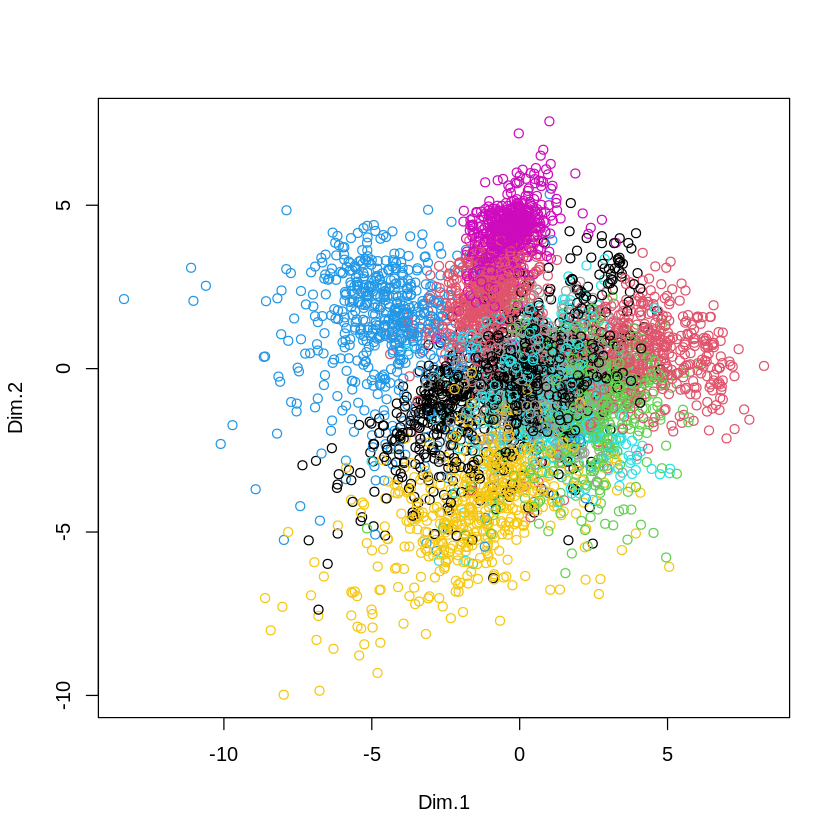

In [113]:
plot(pca.optidigits$ind$coord,col=optidigits$y)

à partir de ce graphe, on remarque la concentration des individues (bitmaps) dans le centre ce qui est expliquer par la mauvaise qualité de représentation (57%) en utilisant les deux premieres composantes.

On peut distinguer quelques classes, surtout celles qui se trouve dans les coté de l'origine mais plus on rapproche l'origine plus on ne peut pas distinguer les classes.

In [106]:
pca.optidigits$eig[0:3,]

eigenvalue percentage of variance cumulative percentage of variance
comp 1 2777.1640  49.415729              49.41573                         
comp 2  428.3907   7.622611              57.03834                         
comp 3  400.6234   7.128531              64.16687

In [114]:
tsne.optidigits=Rtsne(optidigits$X,dim=2 )

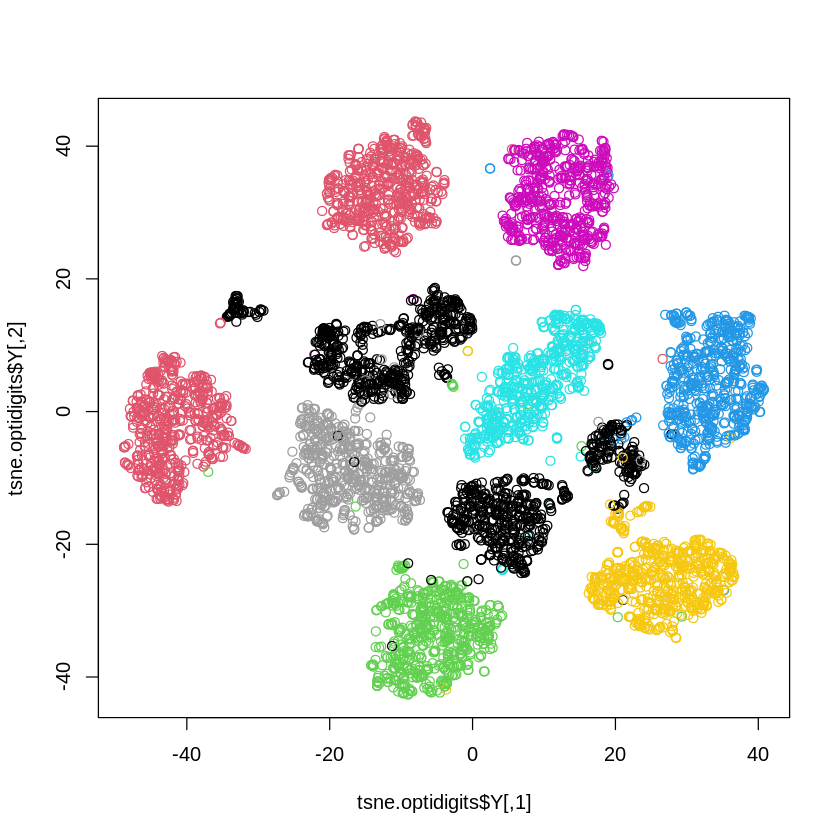

In [9]:
plot(tsne.optidigits$Y,col=optidigits$y)

EN utilisant le TSNE, on a une meilleur qualité de représentation des données avec une bonne visualisation des classes tel que la figure ci-dessus montre.

## 3.Partitionnement

### Kmeans

In [115]:
km.optidigits=NbClust(optidigits$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [118]:
km.optidigits$Best.nc

Number_clusters     Value_Index 
        10.0000          0.1881

### Average

In [116]:
average.optidigits=NbClust(optidigits$X, method = "average", index = "silhouette")

In [117]:
average.optidigits$Best.nc

Number_clusters     Value_Index 
        12.0000          0.1721

### Ward

In [119]:
ward.optidigits=NbClust(optidigits$X, method = "ward.D", index = "silhouette")

In [120]:
ward.optidigits$Best.nc

Number_clusters     Value_Index 
         9.0000          0.1754

### Single

In [121]:
single.optidigits=NbClust(optidigits$X, method = "single", index = "silhouette")

In [122]:
single.optidigits$Best.nc

Number_clusters     Value_Index 
         2.0000         -0.0084

### Complete

In [123]:
complete.optidigits=NbClust(optidigits$X, method = "complete", index = "silhouette")

In [124]:
complete.optidigits$Best.nc

Number_clusters     Value_Index 
        13.0000          0.1292

Le nombre adequat de classe est 10. On remarque que la methode de k-means et apres plusieurs excution propose 10 classes, les autres methodes des CAH (average, ward et complete) donne des valeurs dans les envrons de 10 classes. La methode de cah avec "single" prefere seulement deux classes car elle prends la distance minimale entre deux observations des classes et certes comme les classes seront plus proches (logique de single), on a trouver 2 comme meilleur classification.

## 4.HCPC

In [125]:
hcpcward.optidigits=HCPC(pca.optidigits,method = "ward", nb.clust=-1)

In [126]:
hcpcward.optidigits$call$t$nb.clust

[1] 3

In [127]:
hcpccomp.optidigits=HCPC(pca.optidigits,method = "complete", nb.clust=-1)

In [128]:
hcpccomp.optidigits$call$t$nb.clust

[1] 3

In [129]:
hcpcsingle.optidigits=HCPC(pca.optidigits,method = "single", nb.clust=-1)

In [130]:
hcpcsingle.optidigits$call$t$nb.clust

[1] 3

In [131]:
hcpcav.optidigits=HCPC(pca.optidigits,method = "average", nb.clust=-1)

In [132]:
hcpcav.optidigits$call$t$nb.clust

[1] 3

On remarque un consensus entre les methodes hierarchiques en utilisant les differentes agrégations sur le nombre de classes = 3, cela revient à l'utilisation des deux premieres composantes de PCA qui regroupe 57% de l'information totale. le choix des methodes est expliqué aussi à partir de schéma des points de PCA (voire partie visualisation) dont on remarque moin de séparabilité des points.

## 6.Confusion

In [137]:
table(optidigits$y,hcpcward.optidigits$data.clust$clust)

    
       1   2   3
  1  227 110 234
  2   11   2 544
  3   43   5 524
  4  108 450  10
  5   89  35 434
  6    0 556   2
  7  512   1  53
  8   69  43 442
  9  178  14 370
  10   5 545   4

In [138]:
table(optidigits$y,hcpcav.optidigits$data.clust$clust)

    
       1   2   3
  1  227 110 234
  2   11   2 544
  3   43   5 524
  4  108 450  10
  5   89  35 434
  6    0 556   2
  7  512   1  53
  8   69  43 442
  9  178  14 370
  10   5 545   4

In [139]:
table(optidigits$y,hcpccomp.optidigits$data.clust$clust)

    
       1   2   3
  1  227 110 234
  2   11   2 544
  3   43   5 524
  4  108 450  10
  5   89  35 434
  6    0 556   2
  7  512   1  53
  8   69  43 442
  9  178  14 370
  10   5 545   4

In [140]:
table(optidigits$y,hcpcsingle.optidigits$data.clust$clust)

    
       1   2   3
  1  227 110 234
  2   11   2 544
  3   43   5 524
  4  108 450  10
  5   89  35 434
  6    0 556   2
  7  512   1  53
  8   69  43 442
  9  178  14 370
  10   5 545   4

In [141]:
table(optidigits$y,km.optidigits$Best.partition)

    
       1   2   3   4   5   6   7   8   9  10
  1   10  40   0 346   1   2   0   0 168   4
  2   29 480   0   3   0   6  35   1   2   1
  3  509   5   0   3   5  17  30   0   3   0
  4    0   0 484   8   4  36   9   0  23   4
  5  114   0   1   1 434   0   0   0   5   3
  6    0   0   1   6   0   0   1   1   0 549
  7    0   0   1   3   3 545   6   0   8   0
  8   22   2   0  52   6   1 454   0  12   5
  9  406   0   1   1   7  38   5   0 104   0
  10   0   0   4   0   0   0   0 549   0   1

In [142]:
table(optidigits$y,ward.optidigits$Best.partition)

    
       1   2   3   4   5   6   7   8   9
  1    0   0 194   0  66   0   3 308   0
  2    0   0   0   0 557   0   0   0   0
  3    0   2   1   0  30   3 536   0   0
  4    0  21  18   3   0   0   0   0 526
  5    0   1   1   0   1 516  38   1   0
  6    0   0   1 554   0   0   0   3   0
  7    0 563   1   0   0   0   1   0   1
  8    0   2   2   2  54   0   1 493   0
  9    0  51  98   0   0   1 408   2   2
  10 553   0   0   1   0   0   0   0   0

In [143]:
table(optidigits$y,single.optidigits$Best.partition)

    
       1   2
  1  571   0
  2  557   0
  3  572   0
  4  568   0
  5  558   0
  6  558   0
  7  566   0
  8  553   1
  9  562   0
  10 554   0

- Une mauvaise aggrégation pour ce cas d'étude.

In [144]:
table(optidigits$y,complete.optidigits$Best.partition)

    
       1   2   3   4   5   6   7   8   9  10  11  12  13
  1    0   1  22  36   1   0 109   2 139 261   0   0   0
  2    0   6   0  52 419  13   8  30  26   3   0   0   0
  3    0  15   1   0  45  64   0 441   0   6   0   0   0
  4    0   3 126   3   0   0  12   0  15   1 224   0 184
  5    6   0   3   0   0 243   0 104   0   1   0 201   0
  6    0   0   0 384   0   0   0   0   0 174   0   0   0
  7    0 411   1   0   0   1   2   0 150   0   0   0   1
  8    1  14   0   2  27 238   0   8 231  33   0   0   0
  9   12  49  93   0   0   1   1 398   6   0   0   2   0
  10 549   0   0   1   0   0   0   0   0   0   4   0   0

In [145]:
table(optidigits$y,average.optidigits$Best.partition)

    
       1   2   3   4   5   6   7   8   9  10  11  12
  1    0   1   0   0  54   0 297 203  15   0   0   1
  2    0   0   0   0 544   0  12   0   1   0   0   0
  3    0   0   1   0   1   0   4   0 566   0   0   0
  4    0  38   8   4   0   0   0  14   0 503   1   0
  5    0   0   2   0   0 512   1   0  42   1   0   0
  6    0   0   0 553   0   0   3   2   0   0   0   0
  7    0 523  38   0   0   0   1   3   0   1   0   0
  8    0   1  13   0   1   0 536   1   2   0   0   0
  9    0   9 139   0   0   2   2   0 409   1   0   0
  10 553   0   0   1   0   0   0   0   0   0   0   0

- On remarque que les deux dernieres classes ne contient qu'un seul individu chaqu'une.

> Déja, on trouve des défficultes pour lire les matrices de confusion de hcpc à cause de la grande difference de classification qui résulte une dégradation de la précision de classification par rapport à la plus part des méthode de cah  avec des aggrégation differentes ou k-means.

> On remarque un bon partitionnement des classes, en utilisant nbclust avec plus grande précision que hcpc. Ce qui permet à dire que le nbclust est meilleur que hcpc dans cette situation (On peut augmenter le nombre des composante retenues dans l'ACP pour avoir plus d'information et plus de précision dans le partitionnement).

>Dans ce cas on vas prendre le nombre de classes proposer par nbclust

## 7.Melange

In [147]:
pca.optidigits = PCA(t(optidigits$X), graph = FALSE)

In [148]:
strategie=mixmodStrategy(algo="EM",initMethod="smallEM",nbTry=10,epsilonInInit=0.00001)

In [164]:
mmgRmix.optidigits=mixmodCluster(data=as.data.frame(pca.optidigits$var$coord),nbCluster=3)

In [165]:
mmgRmix.optidigits

****************************************
*** INPUT:
****************************************
* nbCluster =  3 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2    Dim.3    Dim.4      Dim.5   
V1  0.6743 0.2819   -0.2534  0.3137     0.3981  
V2  0.5984 0.2857   -0.4199  0.2845     0.2911  
V3  0.6905 -0.2843  0.3411   -7.616e-05 0.2987  
V4  0.6263 -0.1367  0.3445   0.3871     -0.1363 
V5  0.6655 0.4397   -0.2953  -0.03143   0.09224 
V6  0.7728 -0.1166  -0.1865  -0.0883    -0.04426
V7  0.6726 -0.07696 0.08176  0.3734     -0.03197
V8  0.7636 -0.1086  -0.09716 0.1849     -0.02632
V9  0.612  0.2013   -0.03459 0.3249     0.3244  
V10 0.8164 0.1464   -0.134   -0.1488    -0.02686
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* numb

In [166]:
length(mmgRmix.optidigits@bestResult@partition)

[1] 5620

In [167]:
length(optidigits$y)

[1] 5620

In [168]:
table(mmgRmix.optidigits@bestResult@partition,optidigits$y)

   
      1   2   3   4   5   6   7   8   9  10
  1 257  13  42 545  67   9 535  24 146   6
  2 306 499  62  22 198 530  31 349  10   5
  3   8  45 468   1 293  19   0 181 406 543

In [159]:
mmgMclust.optidigits=Mclust(data= optidigits$X)

In [160]:
table( mmgMclust.optidigits$classification,optidigits$y)

   
      1   2   3   4   5   6   7   8   9  10
  1   2  18  19  19   0   0 546   2  21   0
  2  38 484   4   0   0   0   0   2   0   0
  3   2   0   0   4   1 542   0   3   0   1
  4 329  10   7   5   2   5   3 207   2   1
  5 181   2   2  25   3   1   7   8  91   1
  6  12  33 512   0 128   0   0 103 400   4
  7   7  10  28  47 423  10  10 229  47   4
  8   0   0   0   0   0   0   0   0   0 537
  9   0   0   0 468   1   0   0   0   1   6

In [169]:
mmgRmix.optidigits=mixmodCluster(data=as.data.frame(pca.optidigits$var$coord),nbCluster=10)

In [170]:
mmgRmix.optidigits

****************************************
*** INPUT:
****************************************
* nbCluster =  10 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2    Dim.3    Dim.4      Dim.5   
V1  0.6743 0.2819   -0.2534  0.3137     0.3981  
V2  0.5984 0.2857   -0.4199  0.2845     0.2911  
V3  0.6905 -0.2843  0.3411   -7.616e-05 0.2987  
V4  0.6263 -0.1367  0.3445   0.3871     -0.1363 
V5  0.6655 0.4397   -0.2953  -0.03143   0.09224 
V6  0.7728 -0.1166  -0.1865  -0.0883    -0.04426
V7  0.6726 -0.07696 0.08176  0.3734     -0.03197
V8  0.7636 -0.1086  -0.09716 0.1849     -0.02632
V9  0.612  0.2013   -0.03459 0.3249     0.3244  
V10 0.8164 0.1464   -0.134   -0.1488    -0.02686
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* num

In [171]:
table(mmgRmix.optidigits@bestResult@partition,optidigits$y)

    
       1   2   3   4   5   6   7   8   9  10
  1    6 399   0   0   0   0   0   2   0   0
  2    7  90  67   0 184   3   0 336  22   4
  3    0   1   0 439   4   3   0   1   1   4
  4    2   5   0   6   2 524   0   3   0   7
  5    0   0   0   0   5   4   0   0   1 536
  6  170   3  16  44  10   1  28   5 106   1
  7    0   1  14  27   2   0 432   2  37   0
  8  373   7   3  20  12  22   9  59   0   0
  9    9  25 464   0 170   0   0  18 390   1
  10   4  26   8  32 169   1  97 128   5   1

In [172]:
table(mmgRmix.optidigits@bestResult@partition,mmgMclust.optidigits$classification)

    
        1    2    3    4    5    6    7    8    9
  1     0  405    0    1    0    0    1    0    0
  2     4   73    3  109    4  153  365    2    0
  3     1    0    3    1    2    0    6    0  440
  4     0    4  525    1    0    1   10    3    5
  5     0    0    4    0    0    2    9  531    0
  6    22    1    0    1  295   13   32    1   19
  7   477    0    0    0    0    0   38    0    0
  8    10   35   18  384   17    1   31    0    9
  9     0    4    0    0    3 1022   48    0    0
  10  113    6    0   74    0    0  275    0    3

Les deux type de partitions sont bon, on remarque que mclust retourne la meilleur classification avec 10 classes et mixmod retourne une bonne classification cepandant le choix du nombre de classes revient à l'utilisateur. On a choisi 1à classes dans mixmod car elle donne moins de cas d'erreur.

> A partir de tableau de confusion des deux approches avec 10 classes, on remarque qu'ils ont des resultats tres proches.


## 9. MclustDR
D'apres la doc MclustDR est une méthode de réduction de dimension pour visualiser la structure de regroupement ou de classification obtenue à partir d'un mélange fini de densités gaussiennes.


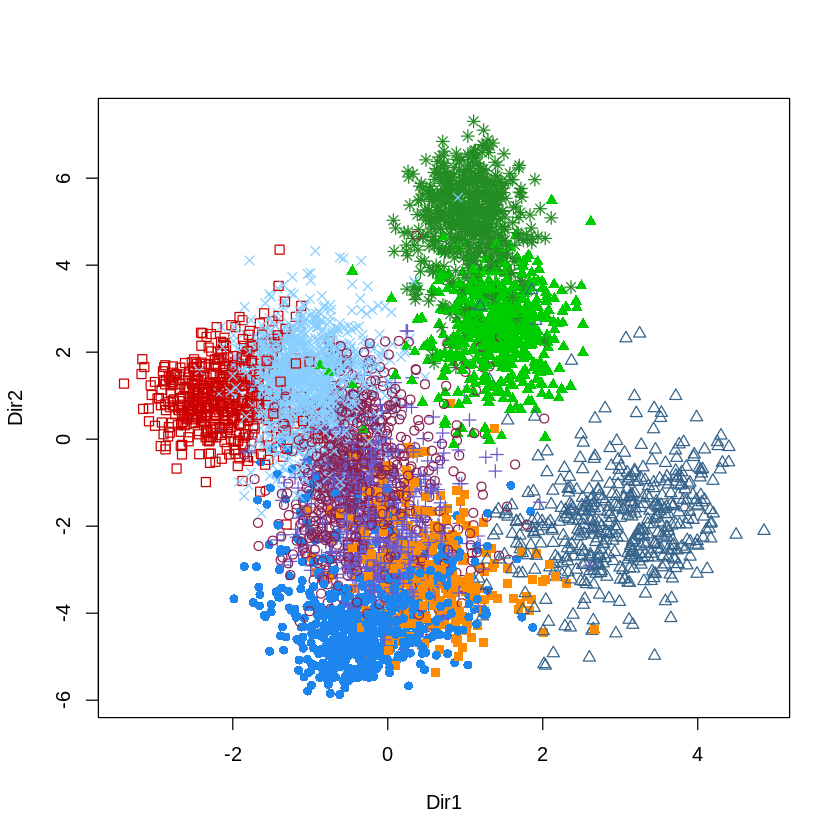

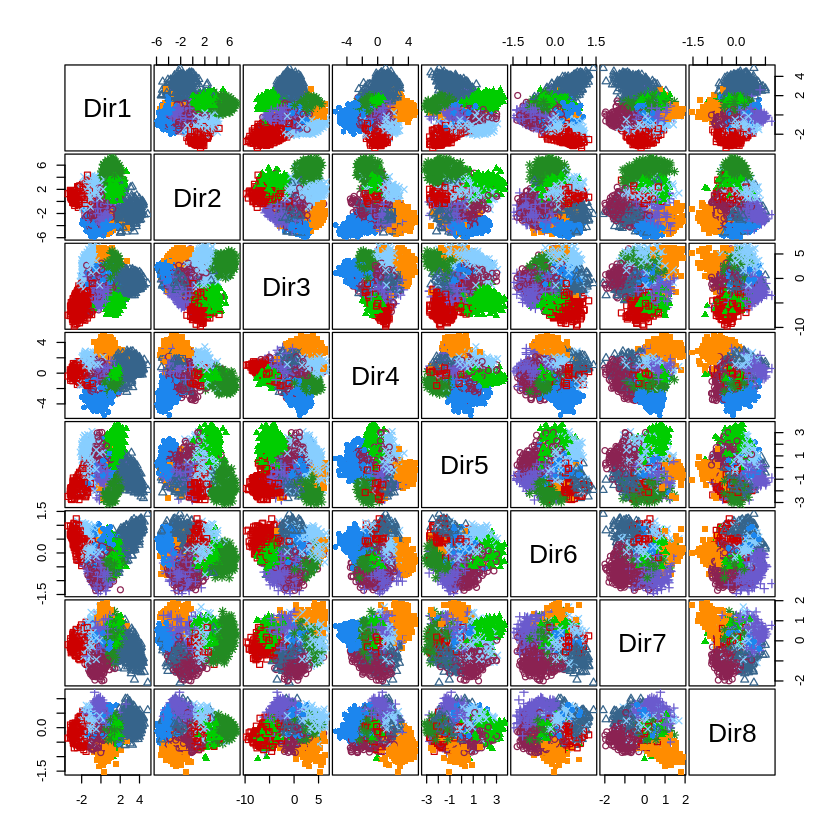

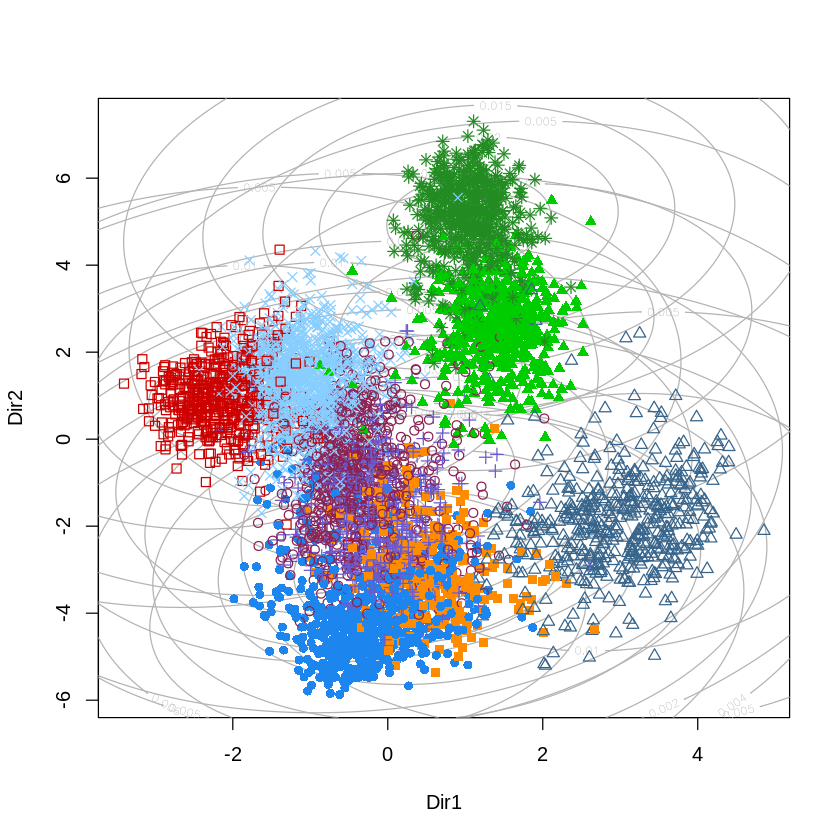

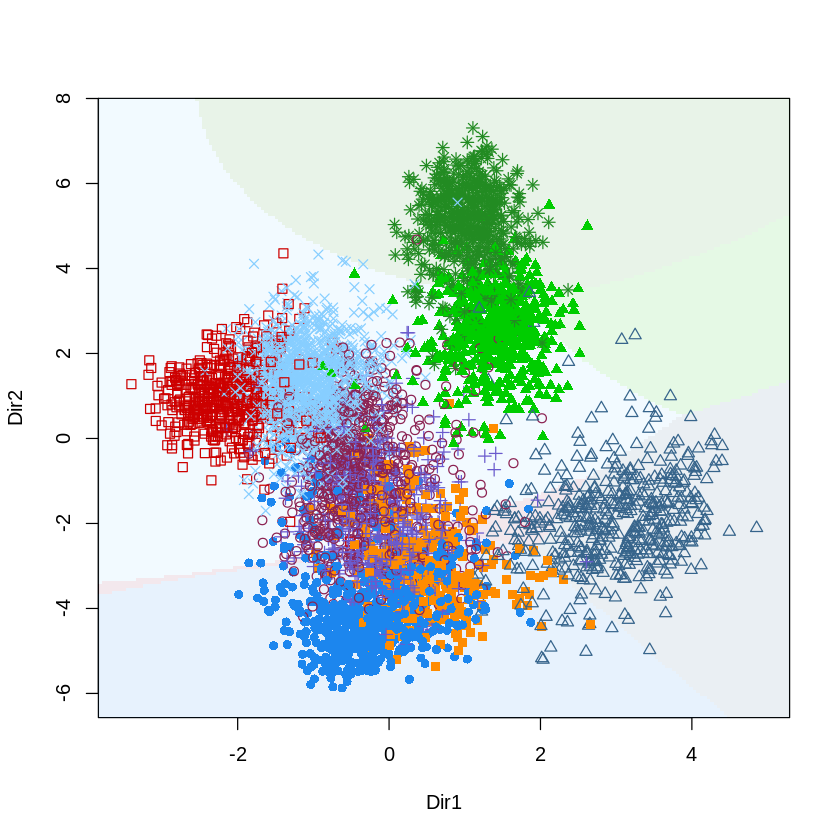

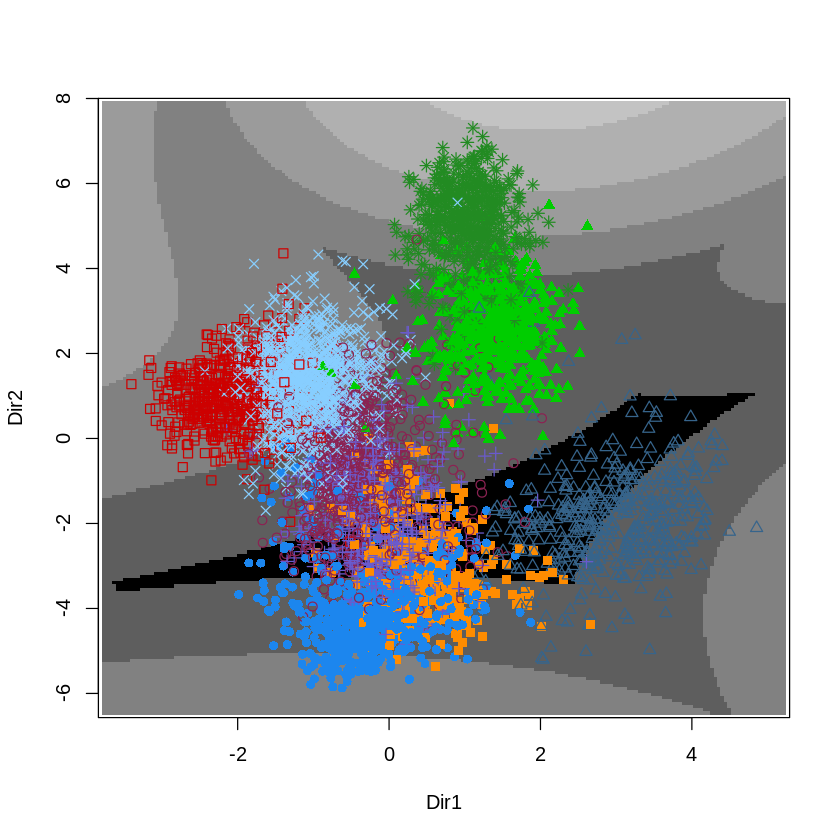

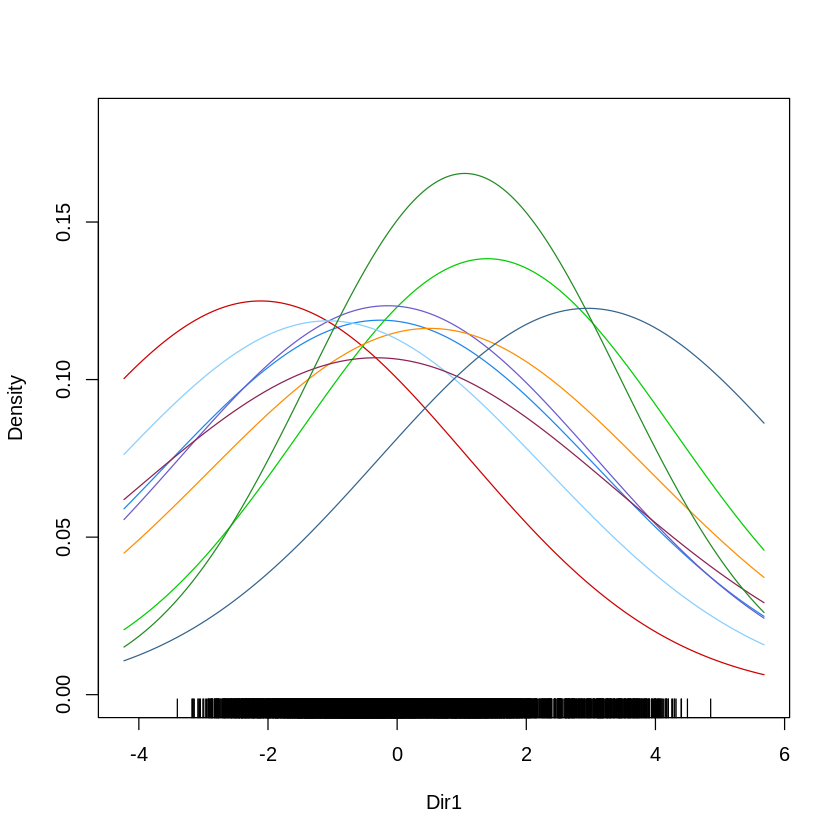

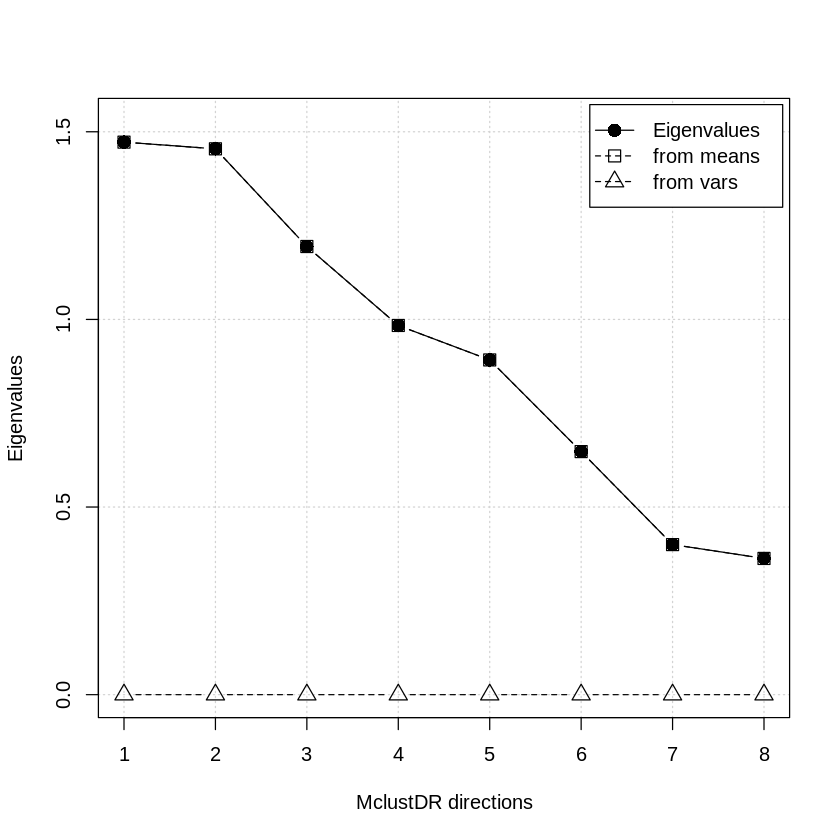

In [45]:
plot(MclustDR(mmgMclust.optidigits))

## 10. Etude comparative

### Kmeans

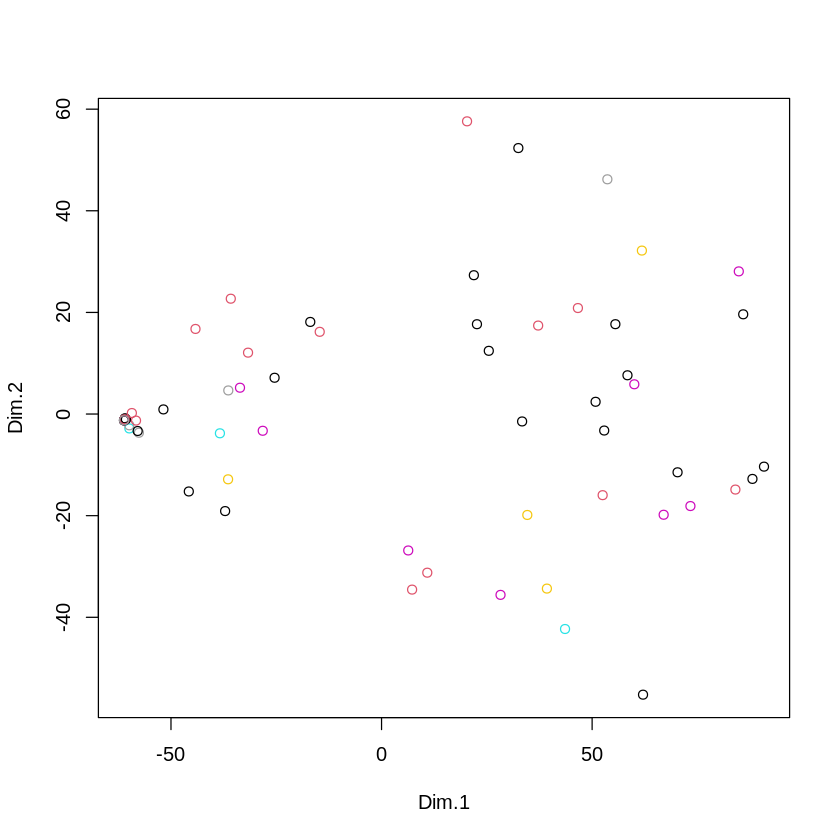

In [46]:
km.optidigits=NbClust(optidigits$X, method = "kmeans", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.optidigits$ind$coord,col=km.optidigits$Best.partition)

In [47]:
unique(as.vector(optidigits$y))

[1] 10  7  4  6  2  5  8  1  9  3

In [48]:
table(km.optidigits$Best.partition,as.vector(optidigits$y))

    
       1   2   3   4   5   6   7   8   9  10
  1   10  29 509   0 114   0   0  22 406   0
  2   40 480   5   0   0   0   0   2   0   0
  3    0   0   0 484   1   1   1   0   1   4
  4  346   3   3   8   1   6   3  52   1   0
  5    1   0   5   4 434   0   3   6   7   0
  6    2   6  17  36   0   0 545   1  38   0
  7    0  35  30   9   0   1   6 454   5   0
  8    0   1   0   0   0   1   0   0   0 549
  9  168   2   3  23   5   0   8  12 104   0
  10   4   1   0   4   3 549   0   5   0   1

In [173]:
(5620-(346+480+509+484+434+549+545+454+406+549))/5620

[1] 0.1537367

In [50]:
NMI(km.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.748943

In [51]:
ARI(km.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.6718752

### Average

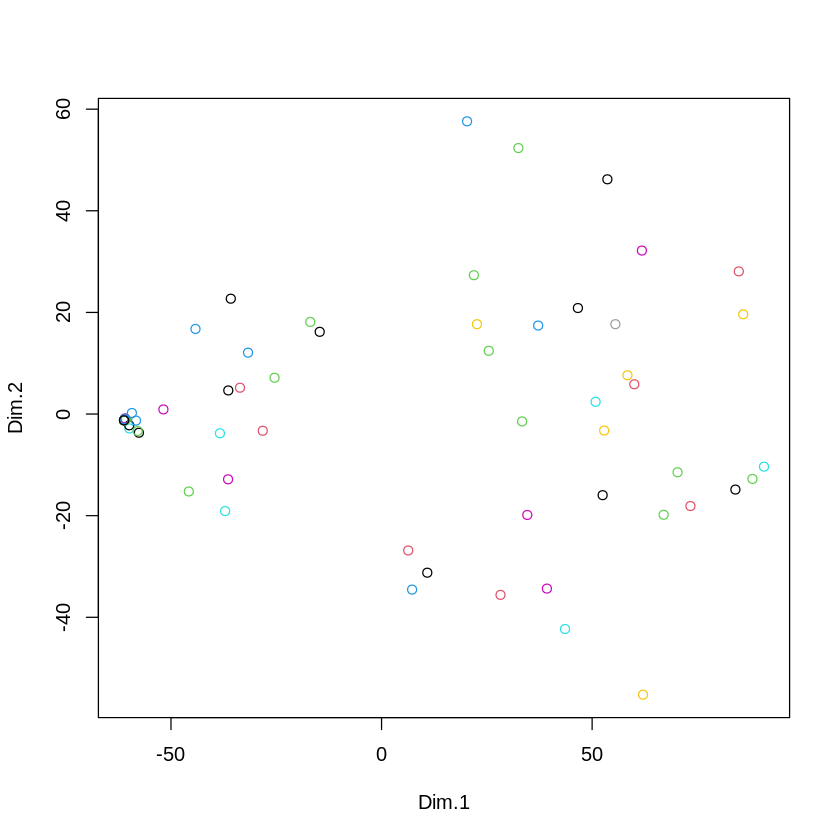

In [52]:
average.optidigits=NbClust(optidigits$X, method = "average", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.optidigits$ind$coord,col=average.optidigits$Best.partition)

In [53]:
table(average.optidigits$Best.partition,as.vector(optidigits$y))

    
       1   2   3   4   5   6   7   8   9  10
  1    0   0   0   4   0 553   0   0   0 554
  2    1   0   0  38   0   0 523   1   9   0
  3    0   0   1   8   2   0  38  13 139   0
  4   54 544   1   0   0   0   0   1   0   0
  5   15   1 566   0 554   0   0   2 411   0
  6  297  12   4   0   1   3   1 536   2   0
  7  203   0   0  14   0   2   3   1   0   0
  8    0   0   0 503   1   0   1   0   1   0
  9    0   0   0   1   0   0   0   0   0   0
  10   1   0   0   0   0   0   0   0   0   0

In [174]:
(5620-(297+544+566+503+554+553+523+536+411+554))/5620

[1] 0.1030249

In [55]:
NMI(average.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.6952781

In [56]:
ARI(average.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.5702526

### Ward

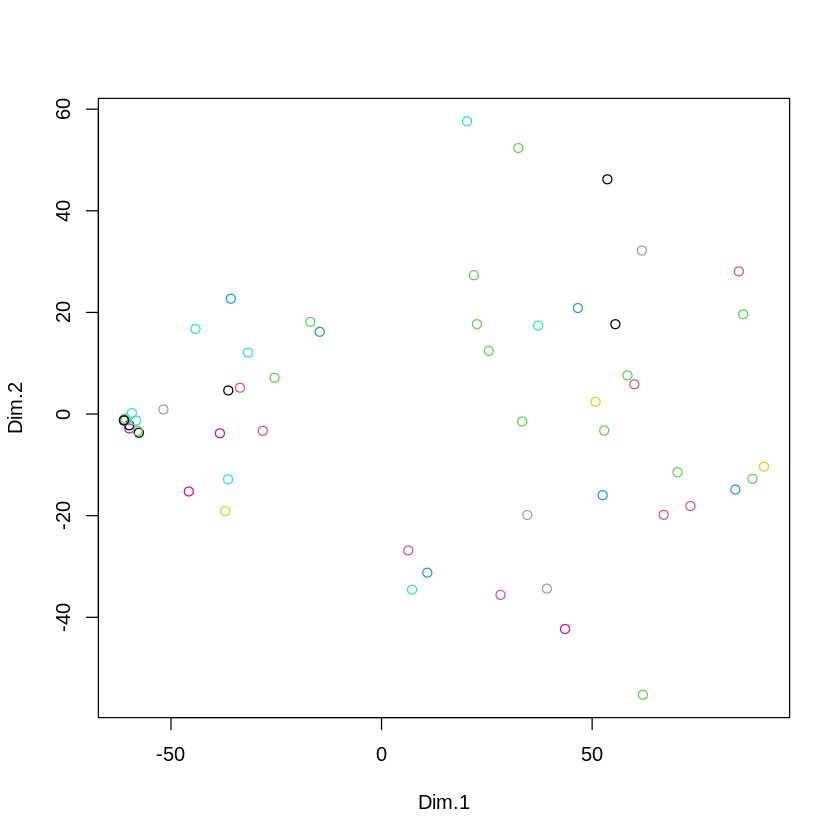

In [57]:
ward.optidigits=NbClust(optidigits$X, method = "ward.D", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.optidigits$ind$coord,col=ward.optidigits$Best.partition)

In [58]:
table(ward.optidigits$Best.partition,as.vector(optidigits$y))

    
       1   2   3   4   5   6   7   8   9  10
  1    0   0   0   0   0   0   0   0   0 553
  2    0   0   2  21   1   0 563   2  51   0
  3  194   0   1  18   1   1   1   2  98   0
  4    0   0   0   3   0 554   0   2   0   1
  5   66 557  30   0   1   0   0  54   0   0
  6    0   0   3   0 516   0   0   0   1   0
  7    3   0 536   0  38   0   1   1 408   0
  8    3   0   0   0   1   2   0 485   2   0
  9    0   0   0 526   0   0   1   0   2   0
  10 305   0   0   0   0   1   0   8   0   0

In [175]:
(5620-(305+557+536+526+516+554+563+485+408+553))/5620

[1] 0.1097865

In [60]:
NMI(ward.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.8338032

In [61]:
ARI(ward.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.7638114

### Complete

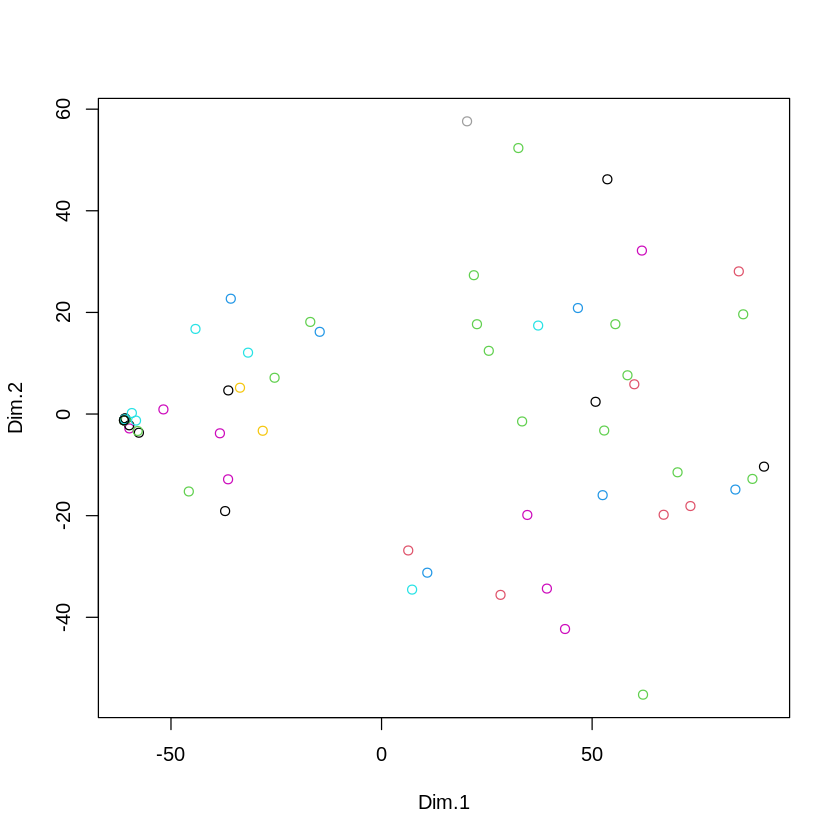

In [62]:
complete.optidigits=NbClust(optidigits$X, method = "complete", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.optidigits$ind$coord,col=complete.optidigits$Best.partition)

In [63]:
table(complete.optidigits$Best.partition,as.vector(optidigits$y))

    
       1   2   3   4   5   6   7   8   9  10
  1    2  30 441   0 110   0   0   9 410 549
  2    1   6  15   3   0   0 411  14  49   0
  3  131   8   1 138   3   0   3   0  94   0
  4   36  52   0   3   0 384   0   2   0   1
  5    1 419  45   0   0   0   0  27   0   0
  6    0  13  64 184 243   0   2 238   1   0
  7  139  26   0  15   0   0 150 231   6   0
  8  261   3   6   1   1 174   0  33   0   0
  9    0   0   0 224   0   0   0   0   0   4
  10   0   0   0   0 201   0   0   0   2   0

In [176]:
(5620-(261+419+441+224+243+384+411+231+410+549))/5620

[1] 0.3642349

In [65]:
NMI(complete.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.5483787

In [66]:
ARI(complete.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.3607227

### Single

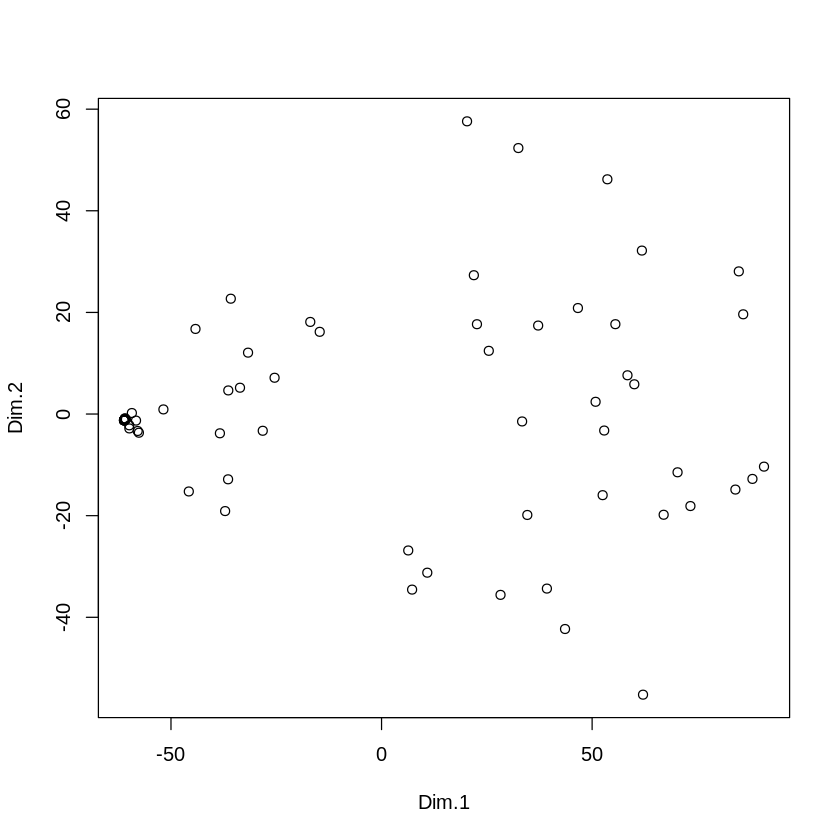

In [67]:
single.optidigits=NbClust(optidigits$X, method = "single", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.optidigits$ind$coord,col=single.optidigits$Best.partition)

In [68]:
table(single.optidigits$Best.partition,as.vector(optidigits$y))

    
       1   2   3   4   5   6   7   8   9  10
  1  571 556 572 566 558 557 563 551 562 554
  2    0   0   0   0   0   0   2   0   0   0
  3    0   0   0   1   0   0   0   0   0   0
  4    0   0   0   0   0   0   0   1   0   0
  5    0   0   0   1   0   0   0   0   0   0
  6    0   0   0   0   0   1   0   0   0   0
  7    0   0   0   0   0   0   1   0   0   0
  8    0   1   0   0   0   0   0   0   0   0
  9    0   0   0   0   0   0   0   1   0   0
  10   0   0   0   0   0   0   0   1   0   0

In [69]:
NMI(single.optidigits$Best.partition,as.vector(optidigits$y))

[1] 0.001781659

In [70]:
ARI(single.optidigits$Best.partition,as.vector(optidigits$y))

[1] 1.856392e-06

### MMG

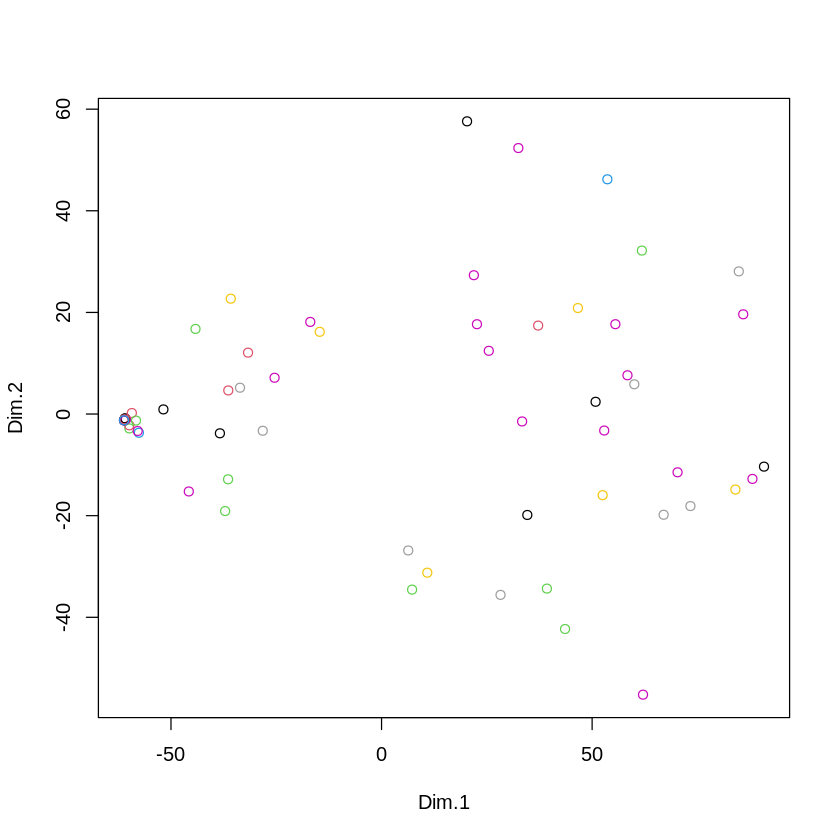

In [71]:
plot(pca.optidigits$ind$coord,col=mmgRmix.optidigits@bestResult@partition)

In [72]:
table(mmgRmix.optidigits@bestResult@partition,as.vector(optidigits$y))

    
       1   2   3   4   5   6   7   8   9  10
  1    9  29 477   0 171   0   0  18 388   3
  2    0   0   0   0   6   6   0   0   1 272
  3    5  46  39   0 148   1   0 290  16   2
  4    0   0   0   0   0   0   0   0   0 266
  5    0   1   0 424   4   6   0   0   0   5
  6  183   3  16  45   7   2  31   4 105   0
  7    1   3   0   6   2 530   0   3   0   5
  8    0   3   9  17   2   0 427   0  29   0
  9  369  70  30  76 218  13 108 237  23   1
  10   4 402   1   0   0   0   0   2   0   0

In [73]:
NMI(mmgRmix.optidigits@bestResult@partition,as.vector(optidigits$y))

[1] 0.5923678

In [74]:
ARI(mmgRmix.optidigits@bestResult@partition,as.vector(optidigits$y))

[1] 0.431945

In [75]:
table( mmgMclust.optidigits$classification,optidigits$y)

   
      1   2   3   4   5   6   7   8   9  10
  1   2  18  19  19   0   0 546   2  21   0
  2  38 484   4   0   0   0   0   2   0   0
  3   2   0   0   4   1 542   0   3   0   1
  4 329  10   7   5   2   5   3 207   2   1
  5 181   2   2  25   3   1   7   8  91   1
  6  12  33 512   0 128   0   0 103 400   4
  7   7  10  28  47 423  10  10 229  47   4
  8   0   0   0   0   0   0   0   0   0 537
  9   0   0   0 468   1   0   0   0   1   6

In [76]:
NMI(mmgMclust.optidigits$classification,as.vector(optidigits$y))

[1] 0.6664549

In [77]:
ARI(mmgMclust.optidigits$classification,as.vector(optidigits$y))

[1] 0.570172

### Conclusion

On peut voir que ward et k-means retournent les meilleurs resultats avec bon qualité de représenatation et bonne précision de classifucation. Suivi par MMG et average qui donnent tous les deux des resultats moyennes. Enfin, on trouve Complete et single avec tres mauvaise résultats.

## t-SNE

### MMG

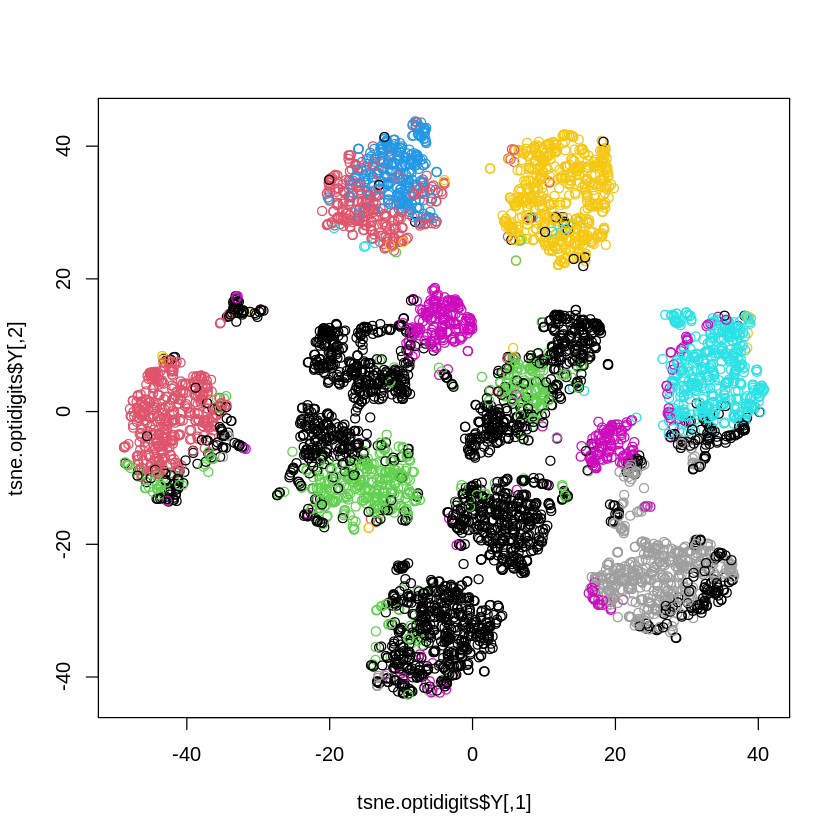

In [79]:
plot(tsne.optidigits$Y,col=mmgRmix.optidigits@bestResult@partition)

### Kmeans

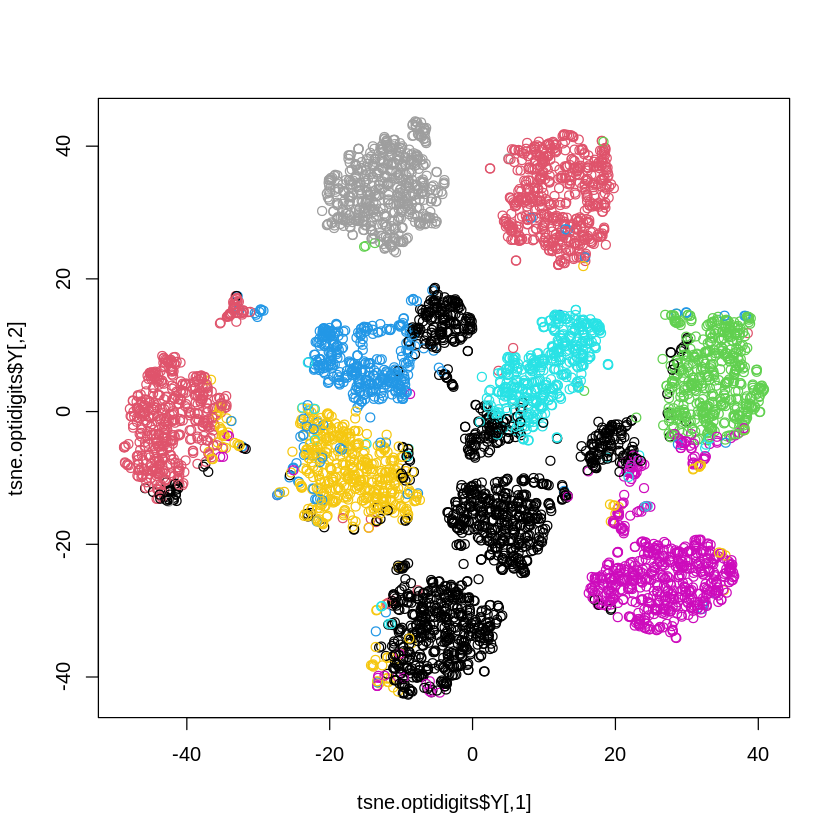

In [80]:
plot(tsne.optidigits$Y,col=km.optidigits$Best.partition)

### Average

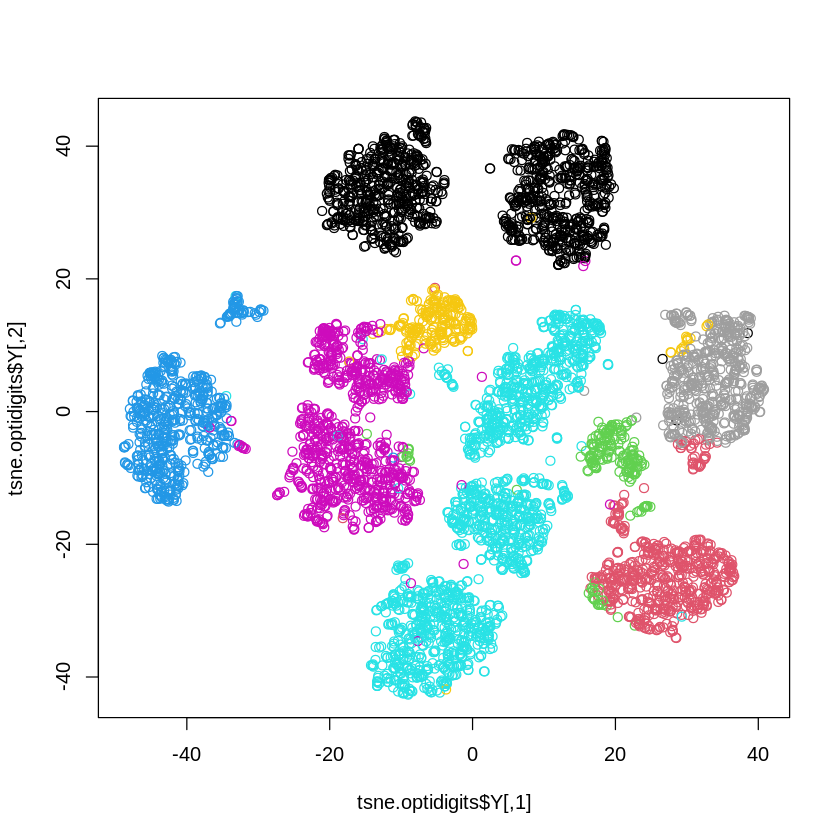

In [81]:
plot(tsne.optidigits$Y,col=average.optidigits$Best.partition)

### Ward

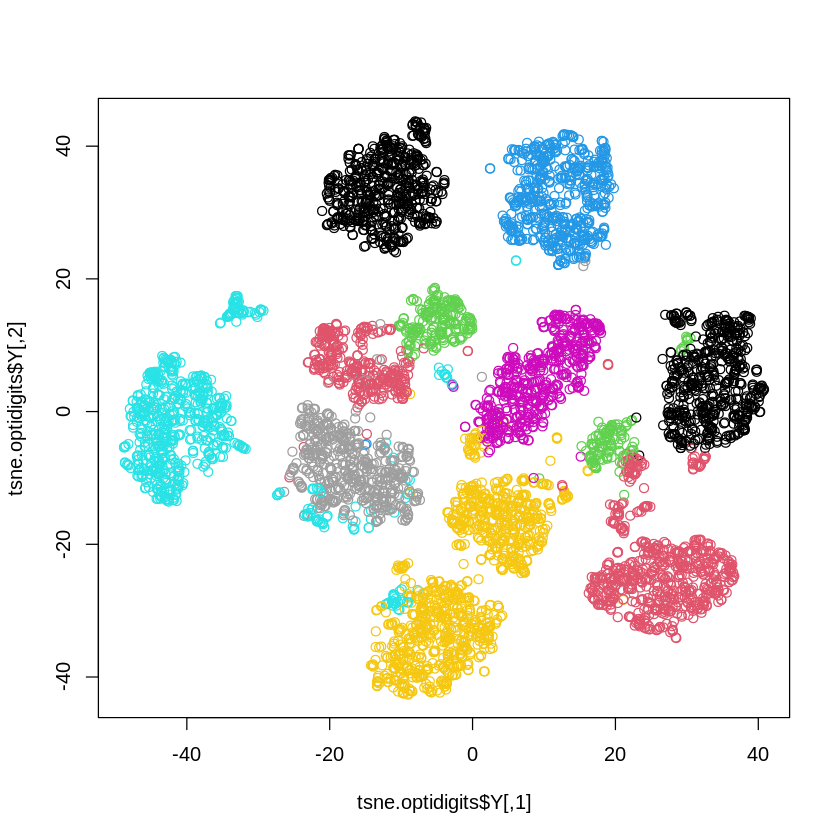

In [82]:
plot(tsne.optidigits$Y,col=ward.optidigits$Best.partition)

### Single

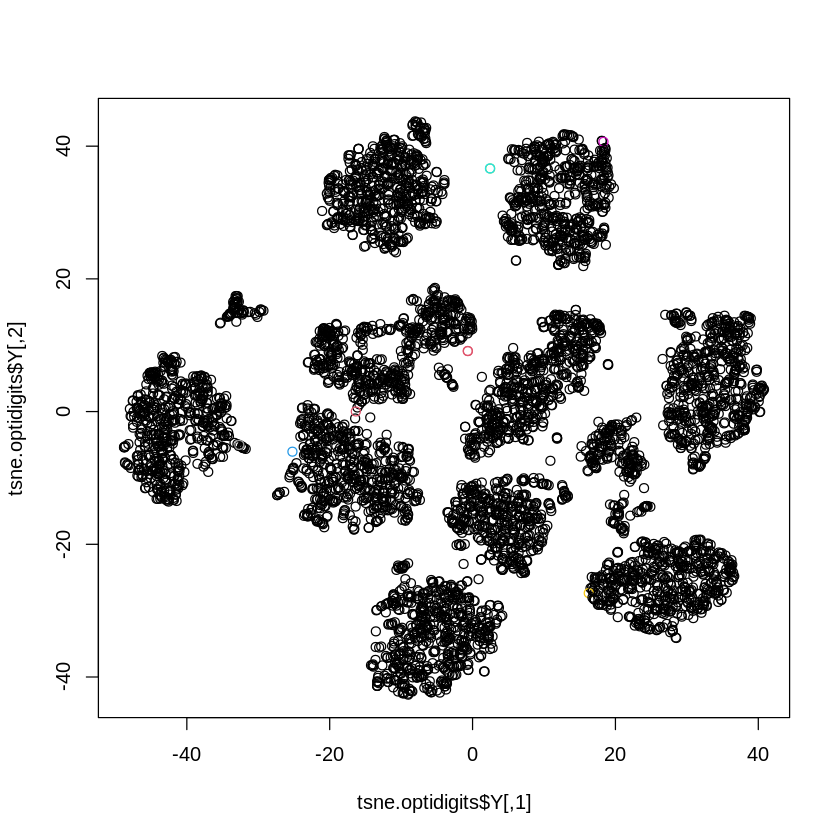

In [83]:
plot(tsne.optidigits$Y,col=single.optidigits$Best.partition)

### Complete

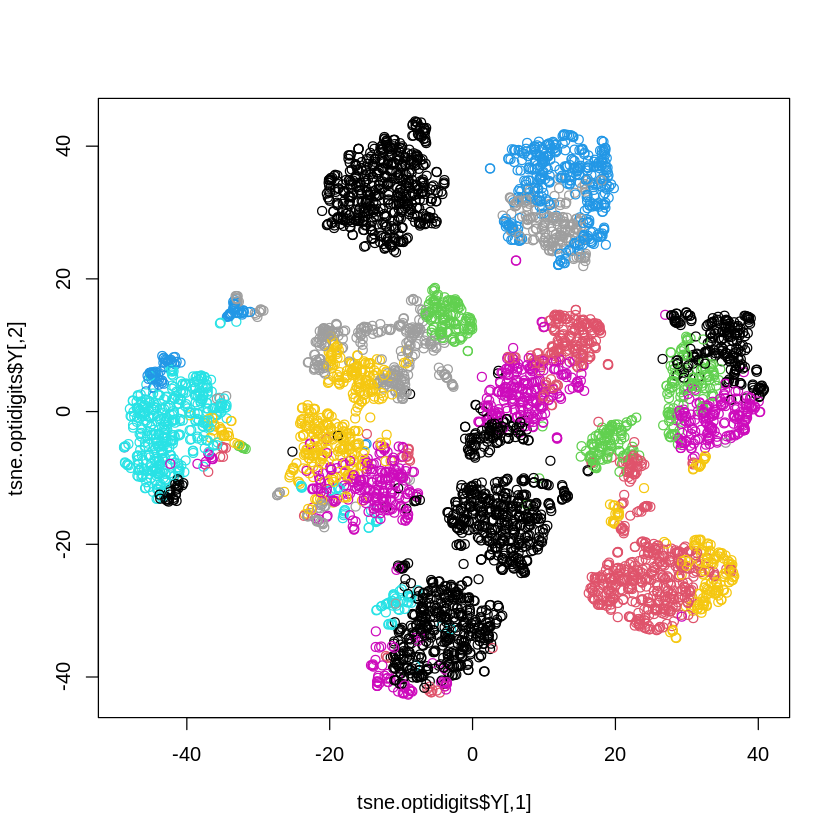

In [84]:
plot(tsne.optidigits$Y,col=complete.optidigits$Best.partition)

## UMAP

In [85]:
umap.optidigits = umap(optidigits$X)

In [86]:
umap.optidigits

umap embedding of 5620 items in 2 dimensions
object components: layout, data, knn, config



### MMG

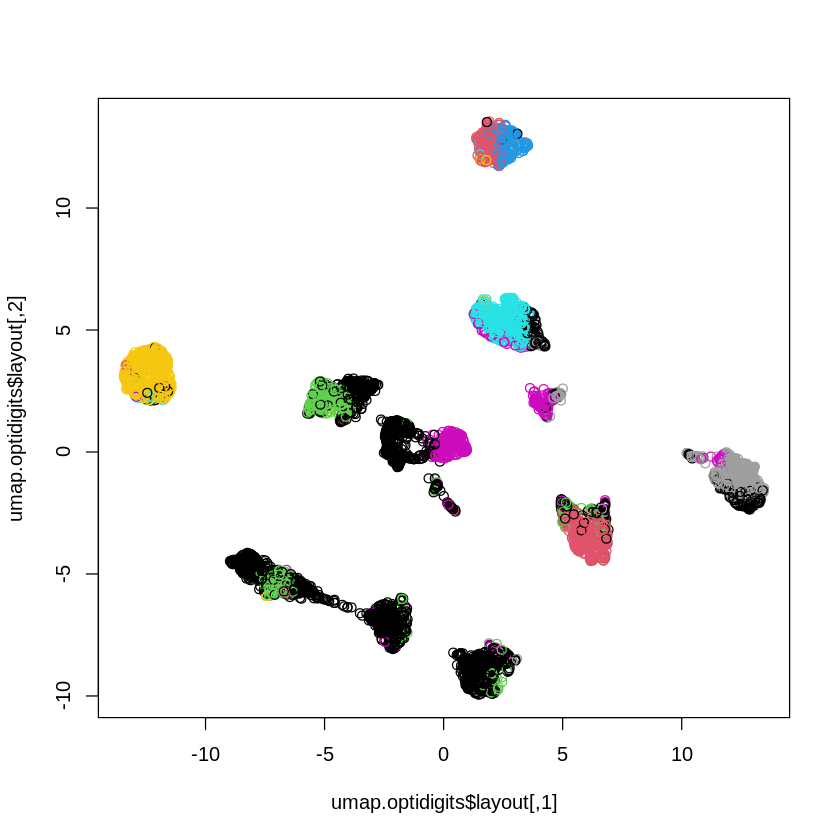

In [87]:
plot(umap.optidigits$layout,col=mmgRmix.optidigits@bestResult@partition)

### Kmeans

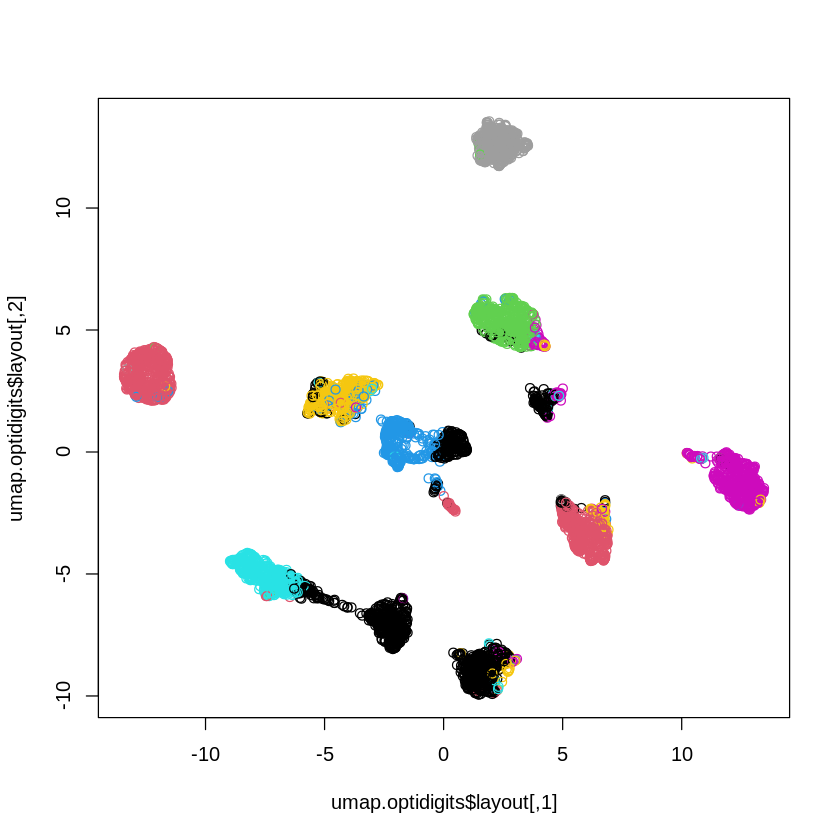

In [88]:
plot(umap.optidigits$layout,col=km.optidigits$Best.partition)

### Average

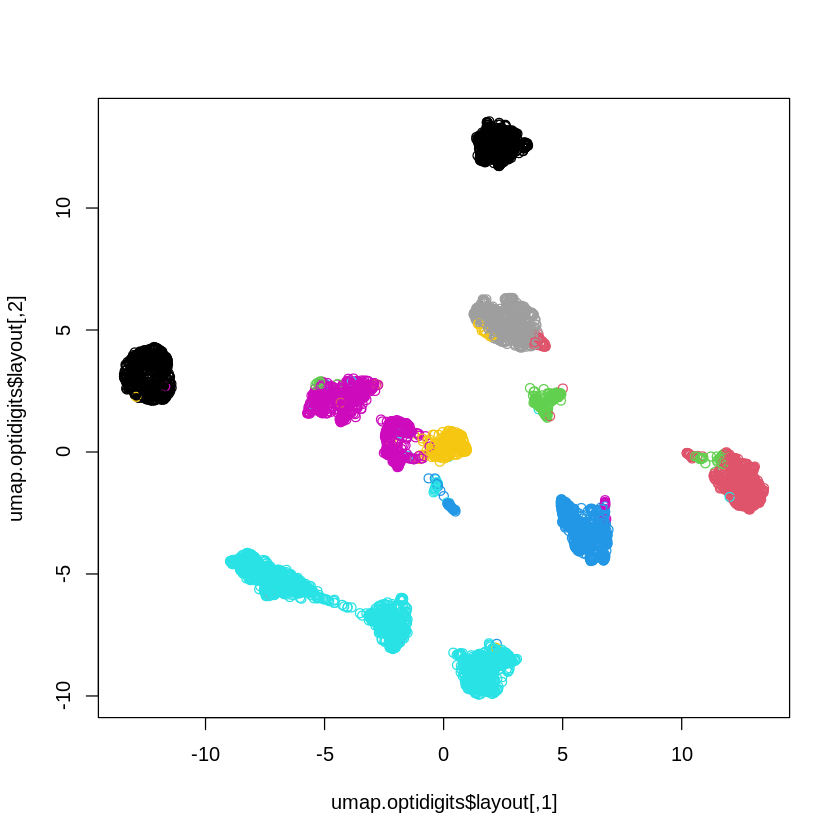

In [89]:
plot(umap.optidigits$layout,col=average.optidigits$Best.partition)

### Ward

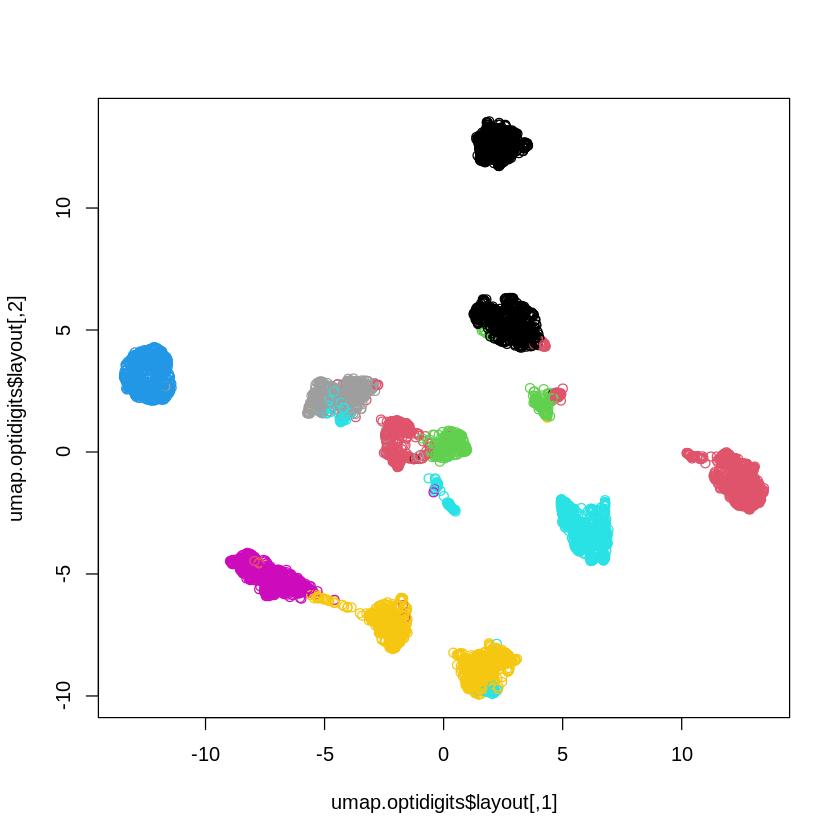

In [90]:
plot(umap.optidigits$layout,col=ward.optidigits$Best.partition)

### Single

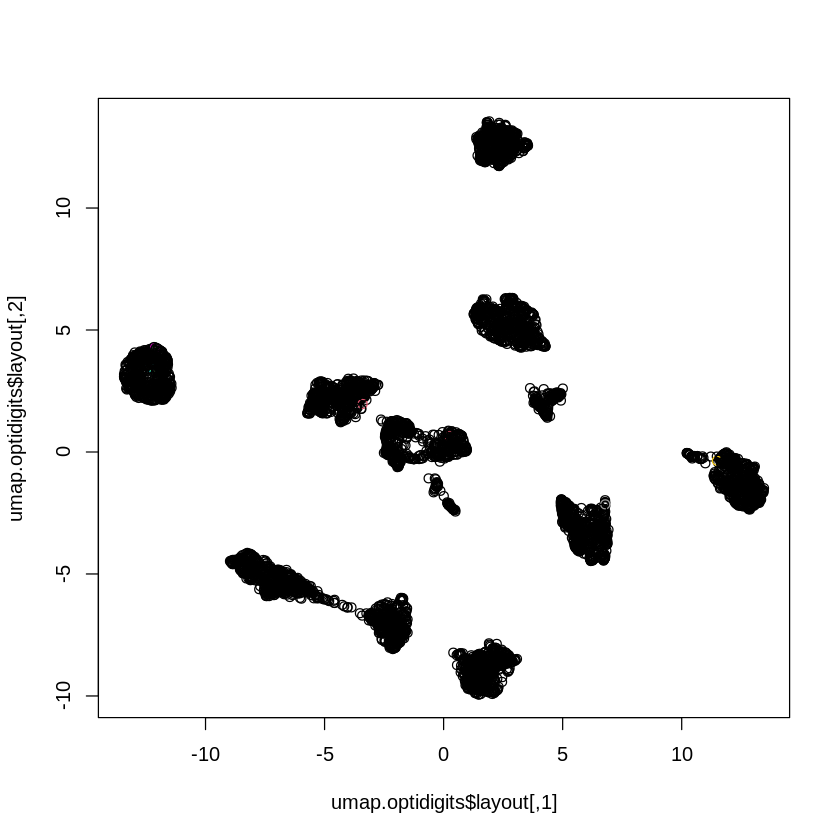

In [91]:
plot(umap.optidigits$layout,col=single.optidigits$Best.partition)

### Complete

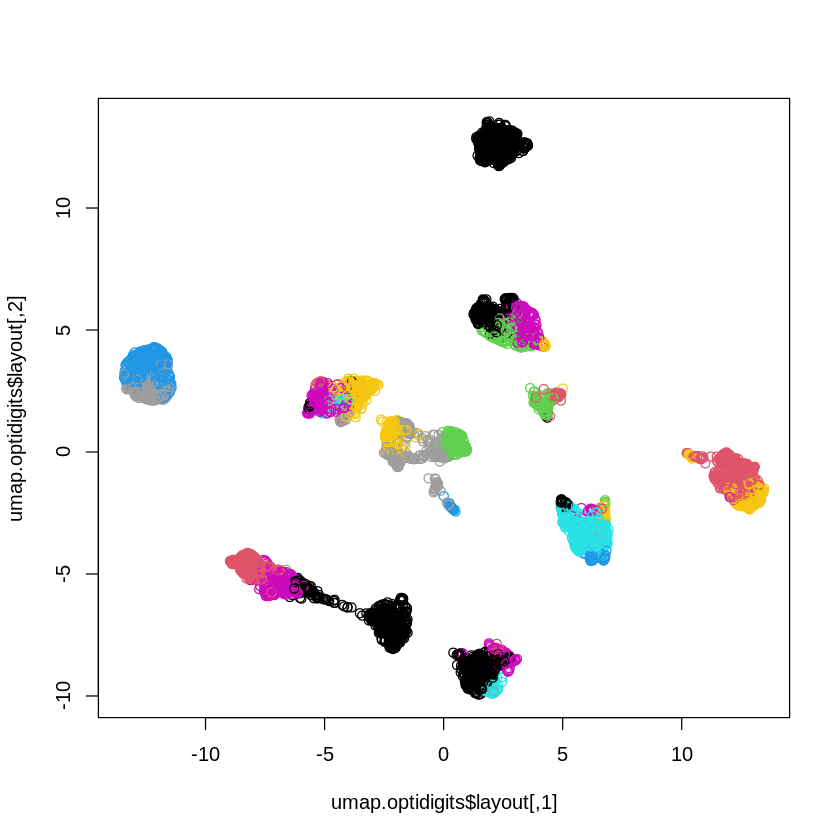

In [92]:
plot(umap.optidigits$layout,col=complete.optidigits$Best.partition)

## Autoencoder

In [179]:
optidigits_reduced <- read.csv(file = 'data/optdigits_reduced.csv', header=F)

In [180]:
mmgMclust.optidigits_reduced=Mclust(data= optidigits_reduced)

In [183]:
mmgMclust.optidigits_reduced

'Mclust' model object: (VVV,8) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

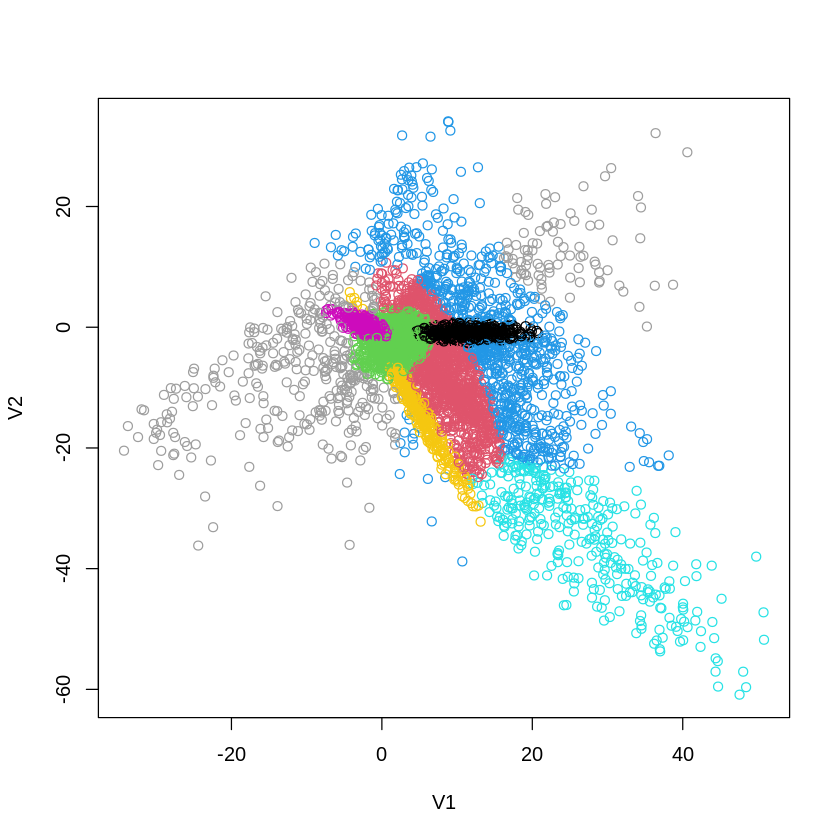

In [181]:
plot(optidigits_reduced,col=mmgMclust.optidigits_reduced$classification)

In [182]:
table(mmgMclust.optidigits_reduced$classification,optidigits$y)

   
      1   2   3   4   5   6   7   8   9  10
  1  42   8  53  15 116   0 259  98 140   1
  2  61  58  79 191  67  60  60  90  45 387
  3 148  72 210  28 112 106 110 212 329  36
  4  40 130  93  70 150  15  89  73  23  97
  5   1   0   1 257   0  37   6   1   0  31
  6 176 100 127   1  35  25  14  70  15   1
  7  55  12   0   4  26 224   2   7   3   1
  8  48 177   9   2  52  91  26   3   7   0

In [184]:
NMI(mmgMclust.optidigits_reduced$classification,as.vector(optidigits$y))

[1] 0.2034112

In [185]:
ARI(mmgMclust.optidigits_reduced$classification,as.vector(optidigits$y))

[1] 0.1162925

## Testing MMG avec UMAP

In [186]:
mmgMclust.optidigits_umap=Mclust(data= umap.optidigits$layout)

In [95]:
mmgMclust.optidigits_umap

'Mclust' model object: (VVV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

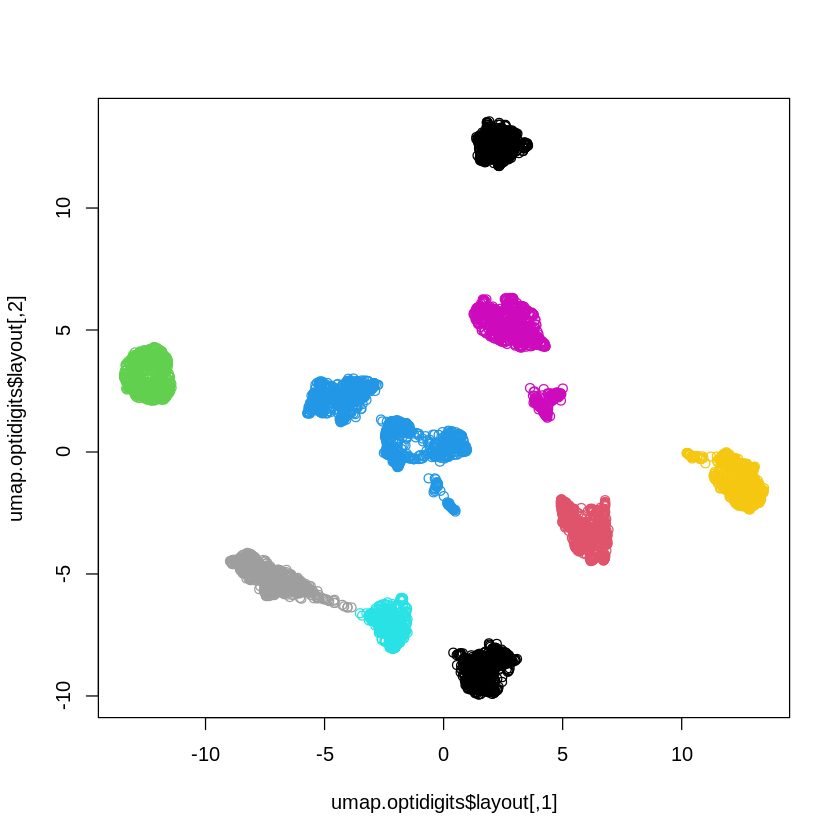

In [96]:
plot(umap.optidigits$layout,col=mmgMclust.optidigits_umap$classification)

In [97]:
table(mmgMclust.optidigits_umap$classification,optidigits$y)

   
      1   2   3   4   5   6   7   8   9  10
  1   0   0 562   0   4   0   1   0   4   0
  2   0 557   0   0   0   0   0   0   0   0
  3   0   0   0   3   0 556   0   2   0   1
  4 569   0   5   1   1   2   3 550   4   0
  5   1   0   1   0   7   0   0   0 405   0
  6   0   0   1 563   2   0   2   2 141   1
  7   1   0   2   1   0   0 560   0   5   0
  8   0   0   1   0 544   0   0   0   3   0
  9   0   0   0   0   0   0   0   0   0 552

In [98]:
NMI(mmgMclust.optidigits_umap$classification,as.vector(optidigits$y))

[1] 0.8824751

In [99]:
ARI(mmgMclust.optidigits_umap$classification,as.vector(optidigits$y))

[1] 0.8309692

> Utilisation de UMAP permet d'avoir un representations des classes qui sont separable et permet au modeles d'avoir des meilleures performances. 

> L'utilisation de l'autoencodeur est moins précis que UMAP qui donne une meilleur séparabilité et plus précis que ACP qui regroupe plus d'individues vers le centre. 

> UMAP est meilleur que Autoencodeur et ACP.